Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# Machine learning models
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


Load Data

In [15]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')


EDA (Exploratory Data Analysis)

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
#checking data shape
df.shape

(7043, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
#check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Data Analysis

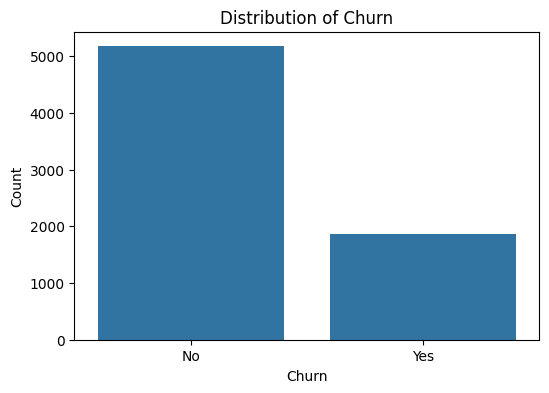

In [26]:
# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

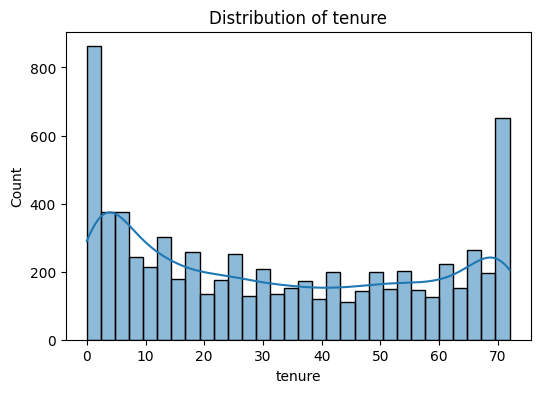

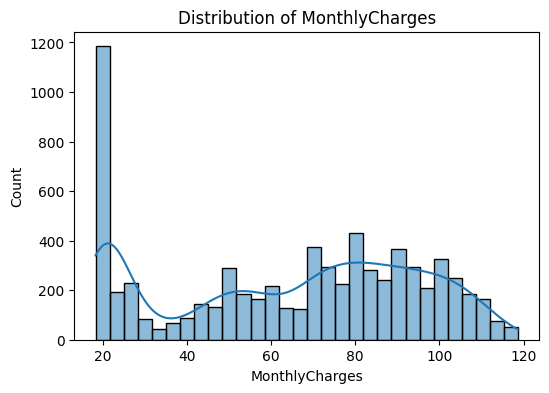

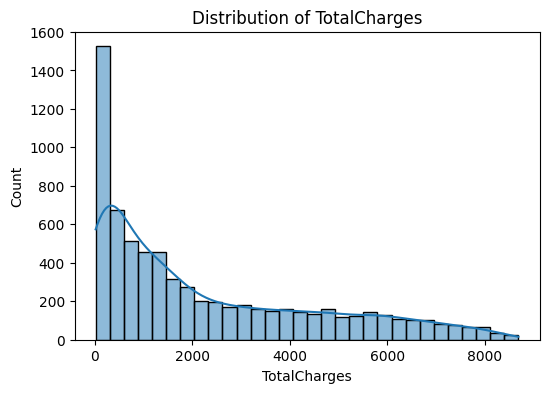

In [27]:
# Distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert TotalCharges to numeric

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

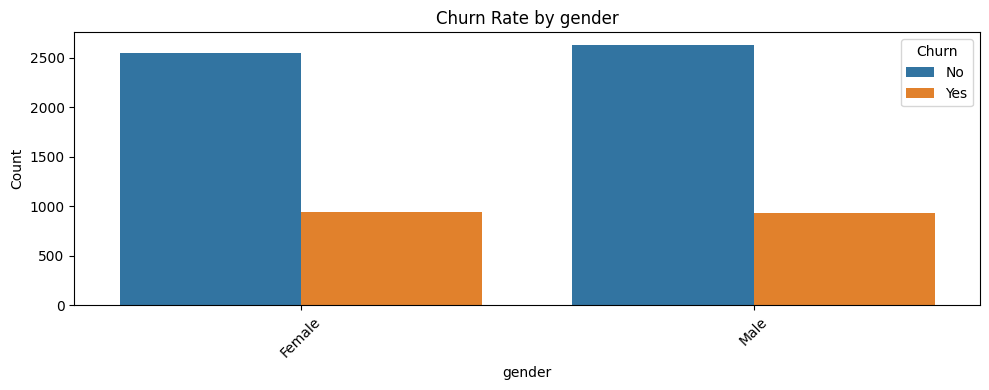

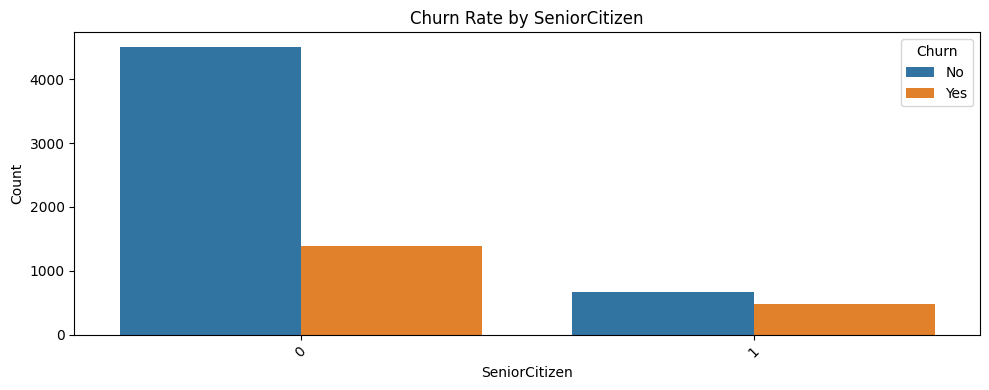

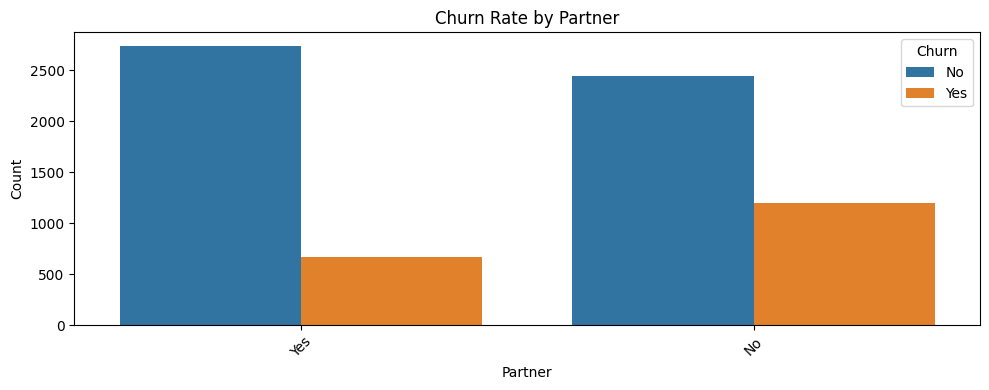

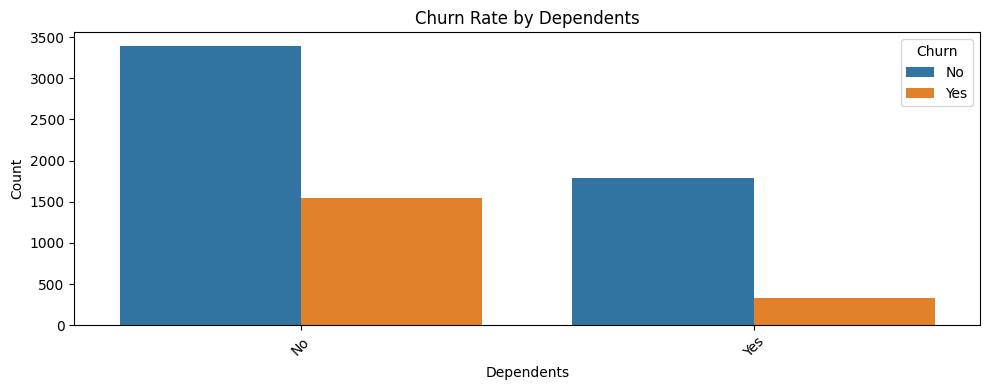

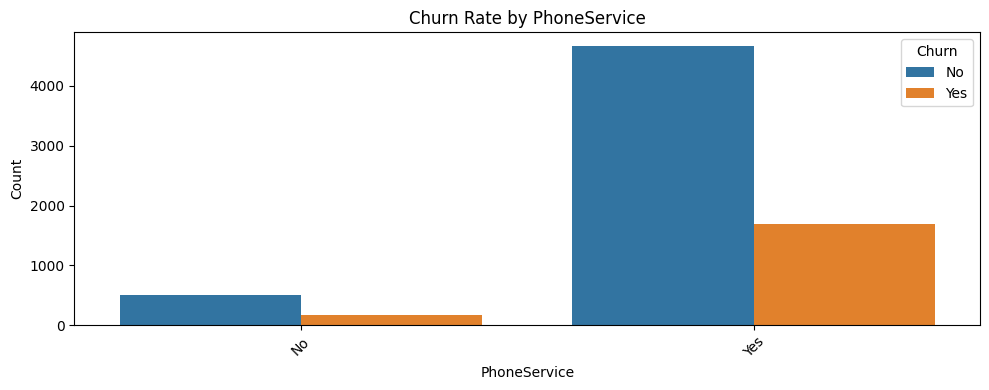

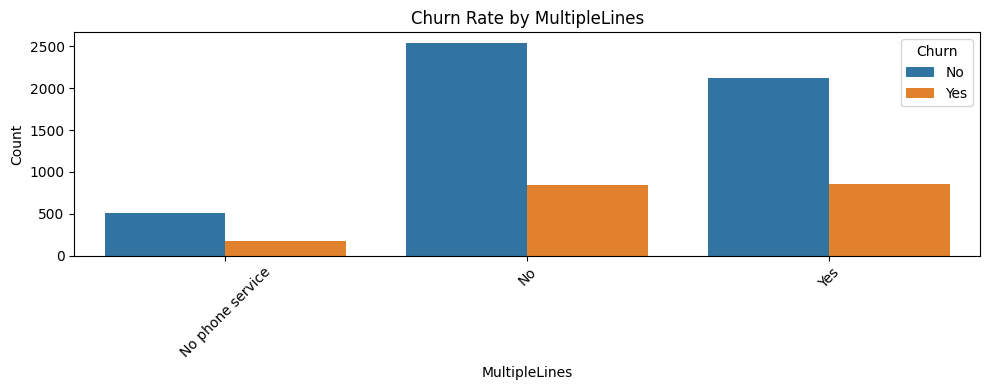

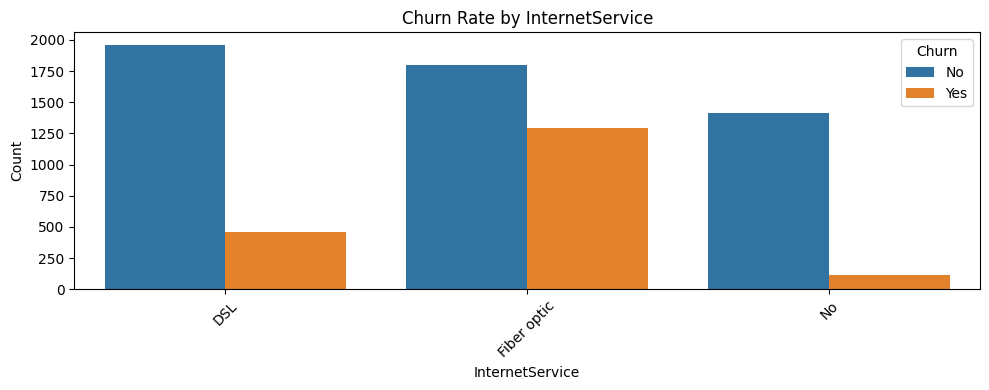

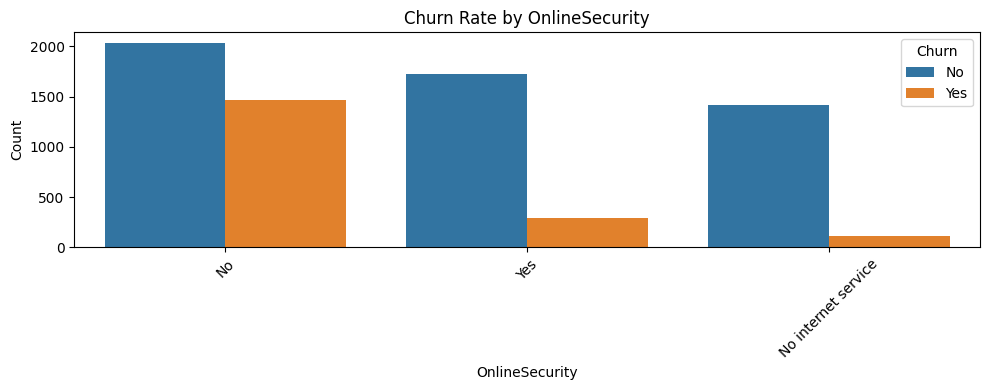

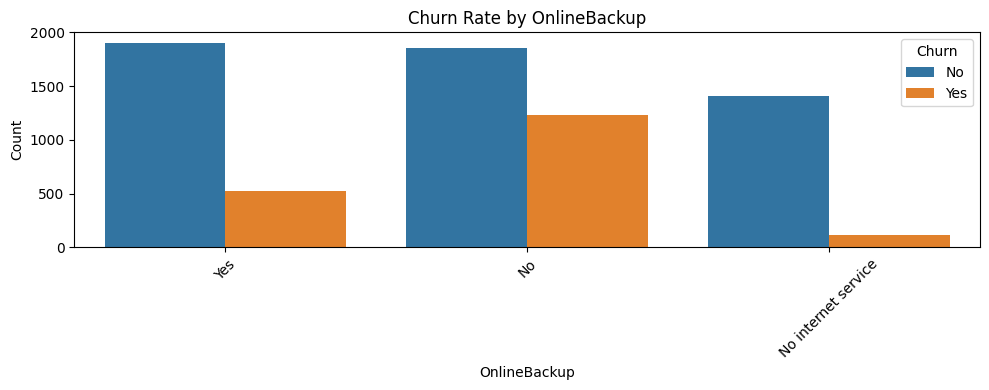

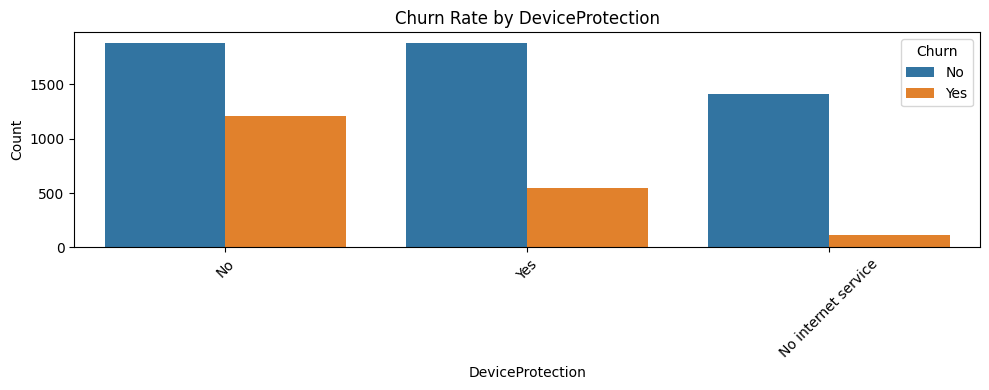

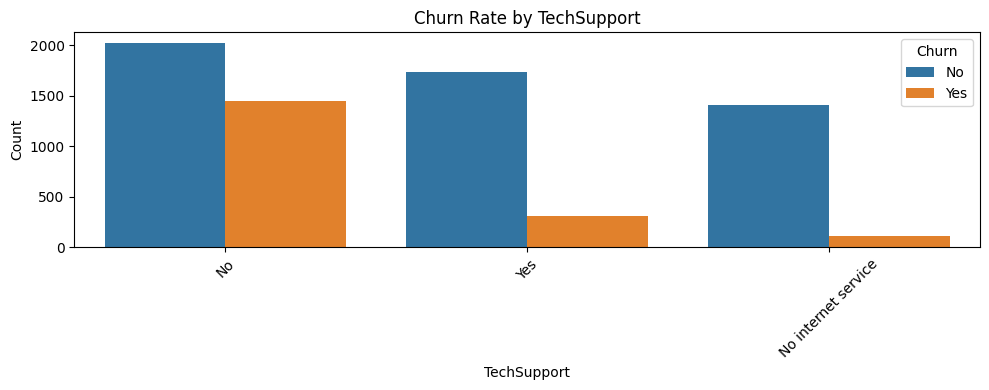

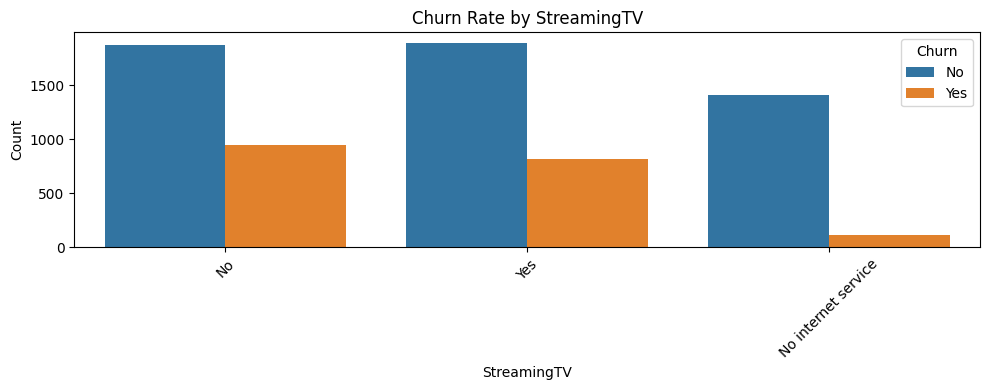

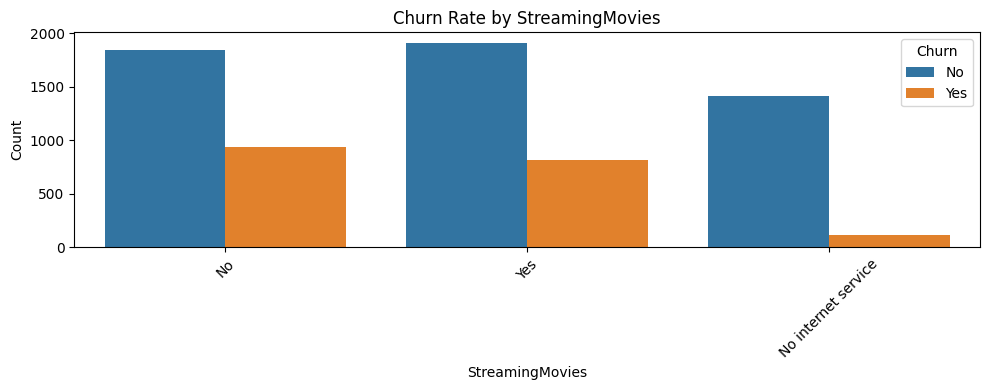

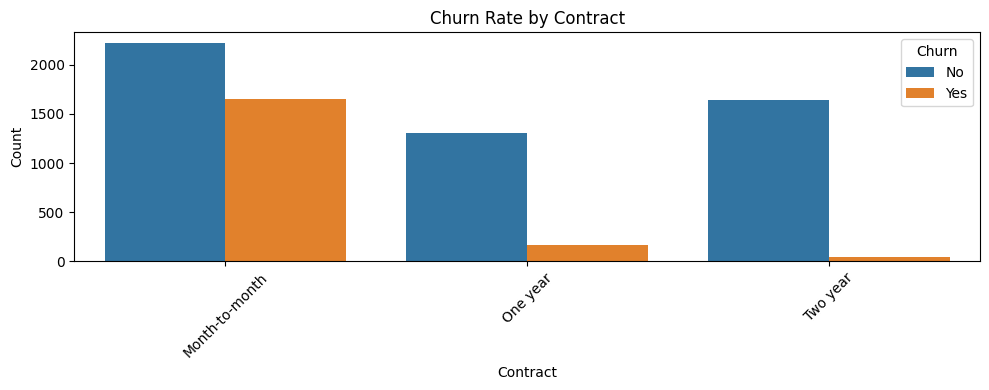

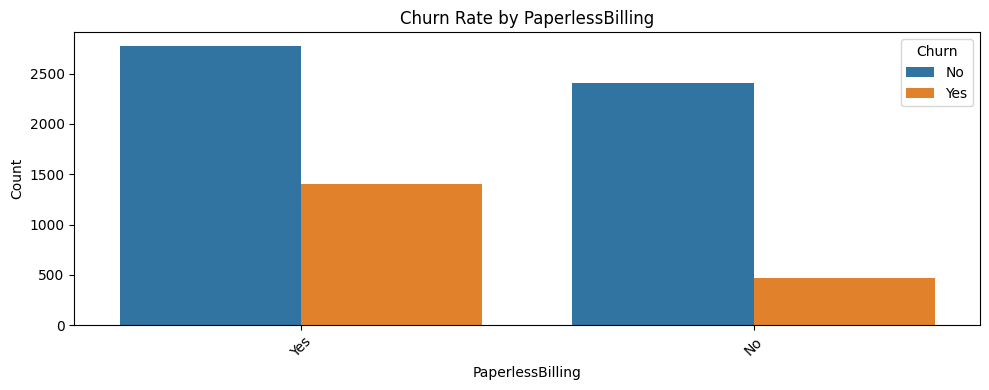

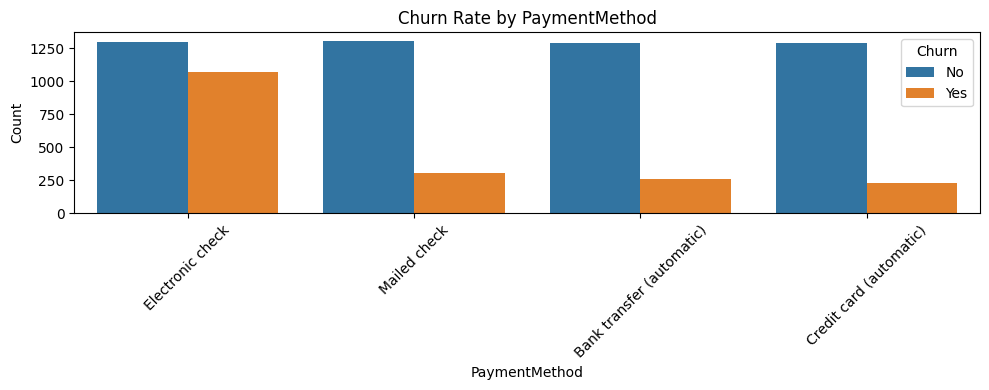

In [28]:
# Churn rate by categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

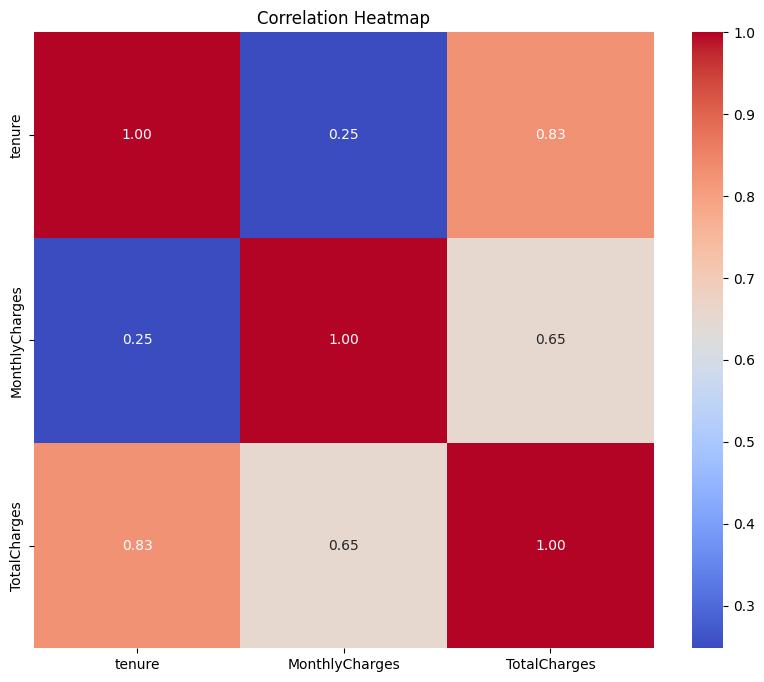

In [29]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

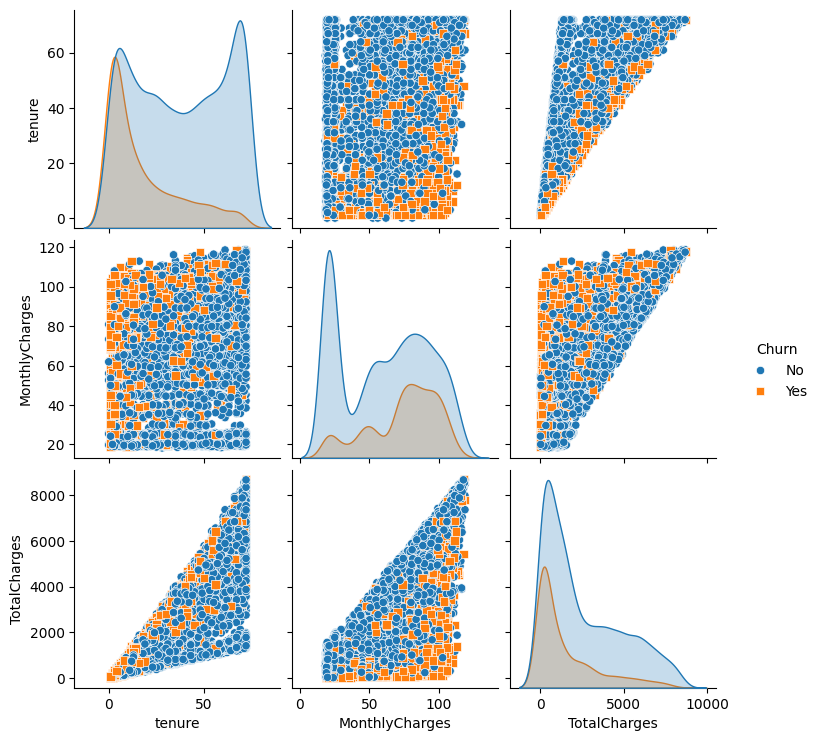

In [30]:
# Only use a subset of features for clarity, including the target variable 'Churn'
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(df[features], hue='Churn', diag_kind='kde', markers=['o', 's'])
plt.show()

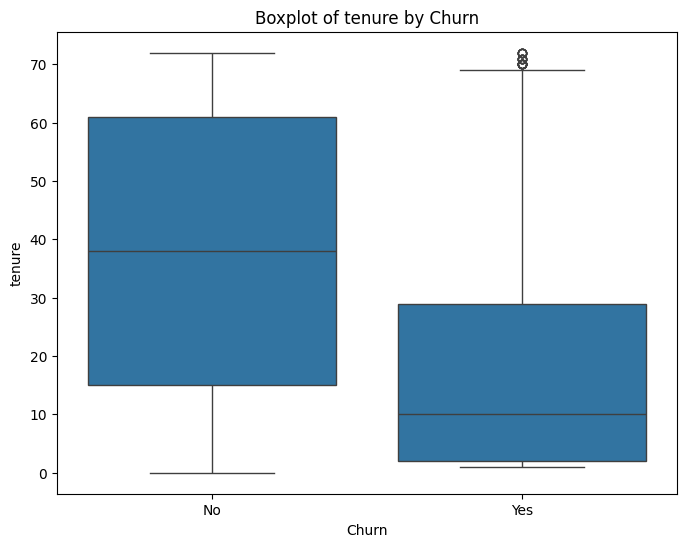

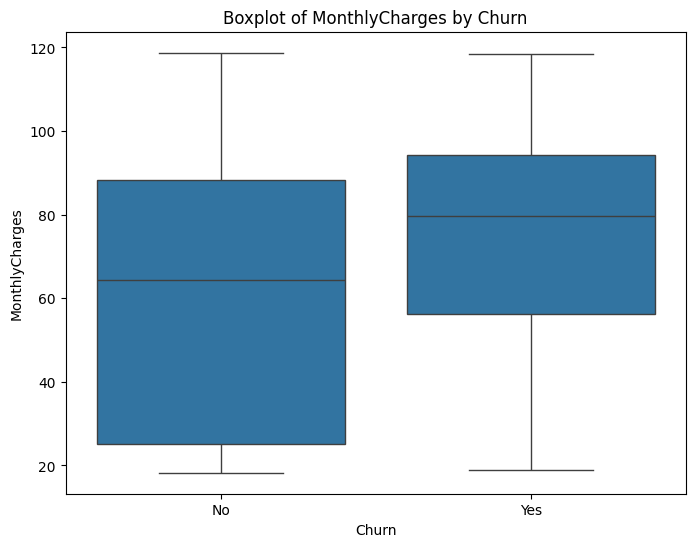

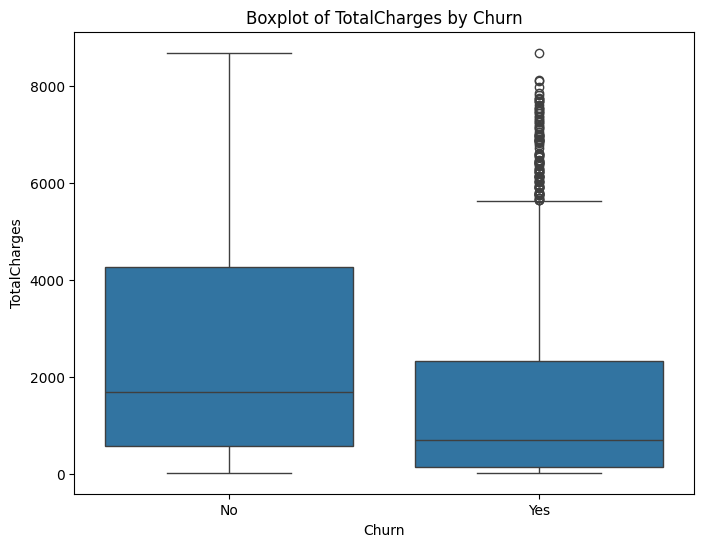

In [31]:
# Boxplots to visualize the distribution of numerical features across churn and non-churn customers
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Churn')
    plt.show()

Data Pre-Processing

In [32]:
# Drop 'customerID' column as it is not useful for modeling
df.drop(columns=['customerID'], inplace=True)

Handle Missing Values

In [33]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the median value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-33-30d047be0812>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Label Encoding

In [34]:
# Label encoding for all categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


Scalling Data

In [52]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Splitting Data

In [53]:
# Split the data into training and testing sets
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target variable

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the processed data
print(X_train.head())
print(y_train.head())

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
5557       0              0        0           0 -1.114563             1   
2270       0              1        0           0 -1.196004             1   
6930       0              0        1           0 -1.196004             1   
2257       0              0        0           0  1.125057             1   
898        0              0        0           0 -0.829521             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
5557              0                1               0             0   
2270              0                1               0             0   
6930              2                1               0             0   
2257              2                0               0             0   
898               0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
5557                 0            0        

# Model Development




Logistic Regression

In [55]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)

In [56]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Evaluation on Training Data

In [57]:
# Predictions on the training set
y_train_pred = log_reg.predict(X_train)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Classification report for precision, recall, and F1-score
train_class_report = classification_report(y_train, y_train_pred)

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(train_class_report)
print("Training Confusion Matrix:")
print(train_conf_matrix)

Training Accuracy: 0.8032454361054767
Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3622
           1       0.65      0.55      0.60      1308

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.79      0.80      0.80      4930

Training Confusion Matrix:
[[3245  377]
 [ 593  715]]


#Model Evaluation

In [58]:
# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

In [59]:
# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

In [60]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_log_reg}")
print("Classification Report:")
print(class_report_log_reg)

Logistic Regression:
Accuracy: 0.8035967818267865
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.57      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



#Cross Validation

In [61]:
# Define the number of folds for cross-validation
k = 5  # You can adjust this value

# Set up the cross-validation procedure
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42, )

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=cv, scoring='accuracy')

# Output the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}')
print(f'Standard deviation of cross-validation scores: {np.std(cv_scores)}')

Cross-validation scores: [0.80766501 0.80695529 0.82114975 0.78693182 0.79119318]
Mean cross-validation score: 0.8027790099361249
Standard deviation of cross-validation scores: 0.01236255107613012


#Confustion Matrix

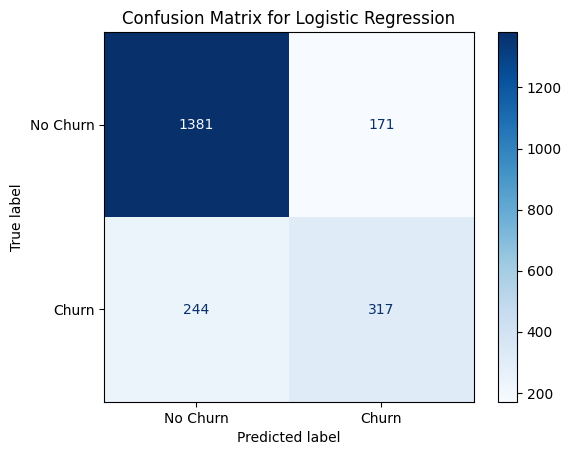

In [62]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#Roc Curve

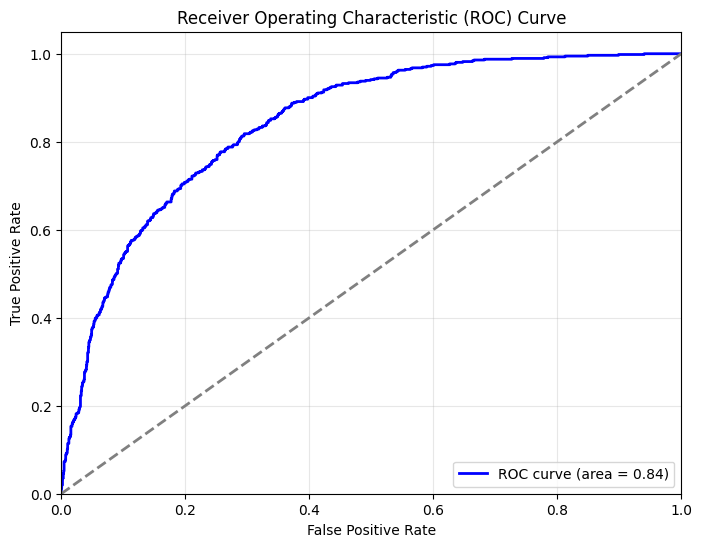

In [63]:
# ROC Curve
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()